# Multinomial Naive Bayes in Python using Text Data from NewsAPI and Twitter API

##### To make the task more interesting, I will also feature engineer a Sentiment Score for each text content, tweets and news, to create 2 labels: Positive and Negative. 

In [387]:
import pandas as pd
import numpy as np
import nltk

tweets_clean = pd.read_csv("../../data/Clean Data/Clean_TokeLemm_Crypto_Tweets.csv", index_col=[0])
news_clean = pd.read_csv("../../data/Clean Data/Clean_TokeLemm_News.csv", index_col=[0])

In [388]:
tweets_clean.head()

,Tokenized_Text,Tweets_Clean,Tweet_Lemmatized
0,"['at', '#', 'metalpay', 'we', 'do', 'not', 'ce...","['metalpay', 'censor', 'thought', 'crime', '.']","['metalpay', 'censor', 'thought', 'crime', '.']"
1,"['also', 'you', 'can', 'bank', 'with', 'crypto...","['also', 'bank', 'crypto', 'get', 'great', 'cu...","['also', 'bank', 'crypto', 'get', 'great', 'cu..."
2,"[""it's…"", '.', '»', 'binance', 'to', 'train', ...","[""it's…"", '.', 'binance', 'train', 'law', 'enf...","[""it's…"", '.', 'binance', 'train', 'law', 'enf..."
3,"['.rt', 'i', 'haven', '’', 't', 'heard', 'one'...","['’', 'heard', 'one', 'single', 'democrat', 'a...","['’', 'heard', 'one', 'single', 'democrat', 'a..."
4,"['also', 'you', 'can', 'bank', 'with', 'crypto...","['also', 'bank', 'crypto', 'get', 'great', 'cu...","['also', 'bank', 'crypto', 'get', 'great', 'cu..."


In [389]:
tweets_clean.shape

(288, 3)

In [390]:
news_clean.head()

,Tokenized_Text,Content_Clean,Content_Lemmatized
0,"['if', 'youre', 'serious', 'about', 'owning', ...","['youre', 'serious', 'owning', 'digital', 'cur...","['youre', 'serious', 'owning', 'digital', 'cur..."
1,"['just', 'as', 'the', 'wallet', 'in', 'your', ...","['wallet', 'pocket', 'stores', 'physical', 'cu...","['wallet', 'pocket', 'store', 'physical', 'cur..."
2,"['it', 'keeps', 'it', 'saf…', '[', '+3718', 'c...","['keeps', 'saf…', '[', '+3718', 'chars', ']', ...","['keep', 'saf…', '[', '+3718', 'char', ']', '...."
3,"['olivia', 'zollino', 'report…', '[', '+1', 'c...","['olivia', 'zollino', 'report…', '[', '+1', 'c...","['olivia', 'zollino', 'report…', '[', '+1', 'c..."
4,"['julian', 'satterthwaite', 'reports', '..', '...","['julian', 'satterthwaite', 'reports', '..', '...","['julian', 'satterthwaite', 'report', '..', 'p..."


In [391]:
news_clean.shape

(92, 3)

# Twitter Sentiment Analysis for Feature Engineering 

In [392]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

lem=[]
for i in tweets_clean['Tweet_Lemmatized']:
  s = "".join(x for x in i)
  n=s.replace("[","").replace("]","").replace(",","").replace("'", "")
  lem.append(n) # encode function throws error due to lemmatized column being list type, 
                #so we remove list brackets from each observation and convert it to a single string

tweets_clean['Tweet_Lemmatized_Sentiment_Analysis']=lem

analyzer = SentimentIntensityAnalyzer()
tweets_clean['rating'] = tweets_clean['Tweet_Lemmatized_Sentiment_Analysis'].apply(analyzer.polarity_scores)

def just_compound(x):
    return x['compound']

tweets_clean['rating'] = tweets_clean['rating'].apply(lambda x: just_compound(x))

avg_sentiment_tweets = tweets_clean['rating'].mean()
avg_sentiment_tweets # helps to assess class imbalance -> if avg sentiment is closer to 0, 
                     #then better balance, can also check with value counts

tweets_clean.head()

,Tokenized_Text,Tweets_Clean,Tweet_Lemmatized,Tweet_Lemmatized_Sentiment_Analysis,rating
0,"['at', '#', 'metalpay', 'we', 'do', 'not', 'ce...","['metalpay', 'censor', 'thought', 'crime', '.']","['metalpay', 'censor', 'thought', 'crime', '.']",metalpay censor thought crime .,-0.7579
1,"['also', 'you', 'can', 'bank', 'with', 'crypto...","['also', 'bank', 'crypto', 'get', 'great', 'cu...","['also', 'bank', 'crypto', 'get', 'great', 'cu...",also bank crypto get great customer service .,0.6249
2,"[""it's…"", '.', '»', 'binance', 'to', 'train', ...","[""it's…"", '.', 'binance', 'train', 'law', 'enf...","[""it's…"", '.', 'binance', 'train', 'law', 'enf...","""its…"" . binance train law enforcement stop cr...",-0.8360
3,"['.rt', 'i', 'haven', '’', 't', 'heard', 'one'...","['’', 'heard', 'one', 'single', 'democrat', 'a...","['’', 'heard', 'one', 'single', 'democrat', 'a...",’ heard one single democrat acknowledge addres...,-0.8750
4,"['also', 'you', 'can', 'bank', 'with', 'crypto...","['also', 'bank', 'crypto', 'get', 'great', 'cu...","['also', 'bank', 'crypto', 'get', 'great', 'cu...",also bank crypto get great customer service .,0.6249


In [393]:
avg_sentiment_tweets

-0.38656180555555525

### Average Sentiment of All Tweets is -0.39 (rounded to 2 dp), which implies there are more negative words associated with crypto attacks in tweets. The value_counts() below also confirms this as we have 177 negative tweets and 111 positive tweets. To conduct Naive Bayes fairly, I would typically want a more balanced class of labels, let's see what the overall sentiment is for news articles and hope it is relatively more positive to gain balanced classes

In [394]:
tweets_clean.shape

(288, 5)

In [395]:
tweets_clean['label'] = tweets_clean['rating'].apply(lambda x: "Negative" if x<0 else "Positive")

In [396]:
tweets_clean['label'].value_counts()

Negative    177
Positive    111
Name: label, dtype: int64

In [397]:
tweets_clean.drop(['Tokenized_Text', 'Tweets_Clean', 'Tweet_Lemmatized', 'rating'], axis=1, inplace=True)
tweets_clean.rename(columns={"Tweet_Lemmatized_Sentiment_Analysis": "Content_Lemmatized_Sentiment_Analysis"}, inplace=True)


In [398]:
tweets_clean

,Content_Lemmatized_Sentiment_Analysis,label
0,metalpay censor thought crime .,Negative
1,also bank crypto get great customer service .,Positive
2,"""its…"" . binance train law enforcement stop cr...",Negative
3,’ heard one single democrat acknowledge addres...,Negative
4,also bank crypto get great customer service .,Positive
...,...,...
283,apparently also happens crime gang form tortu...,Negative
284,uk proposed online safety bill economic crime ...,Negative
285,need mo betta law !,Positive
286,one make crime disagree democrat .,Negative


# News Sentiment Analysis for Feature Engineering 

In [399]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

lem=[]
for i in news_clean['Content_Lemmatized']:
  s = "".join(x for x in i)
  n=s.replace("[","").replace("]","").replace("'","").replace(",","")
  lem.append(n) # encode function throws error due to lemmatized column being list type, so we remove list brackets from each observation and convert it to a single string

news_clean['Content_Lemmatized_Sentiment_Analysis']=lem

analyzer = SentimentIntensityAnalyzer()
news_clean['rating'] = news_clean['Content_Lemmatized_Sentiment_Analysis'].apply(analyzer.polarity_scores)

def just_compound(x):
    return x['compound']

news_clean['rating'] = news_clean['rating'].apply(lambda x: just_compound(x))

avg_sentiment_news = news_clean['rating'].mean()
avg_sentiment_news # helps to assess class imbalance -> if avg sentiment is closer to 0, then better balance, can also check with value counts

news_clean.head()

,Tokenized_Text,Content_Clean,Content_Lemmatized,Content_Lemmatized_Sentiment_Analysis,rating
0,"['if', 'youre', 'serious', 'about', 'owning', ...","['youre', 'serious', 'owning', 'digital', 'cur...","['youre', 'serious', 'owning', 'digital', 'cur...",youre serious owning digital currency need ha...,-0.0772
1,"['just', 'as', 'the', 'wallet', 'in', 'your', ...","['wallet', 'pocket', 'stores', 'physical', 'cu...","['wallet', 'pocket', 'store', 'physical', 'cur...",wallet pocket store physical currency crypto ...,0.0000
2,"['it', 'keeps', 'it', 'saf…', '[', '+3718', 'c...","['keeps', 'saf…', '[', '+3718', 'chars', ']', ...","['keep', 'saf…', '[', '+3718', 'char', ']', '....",keep saf… +3718 char .pointed question coinb...,-0.9460
3,"['olivia', 'zollino', 'report…', '[', '+1', 'c...","['olivia', 'zollino', 'report…', '[', '+1', 'c...","['olivia', 'zollino', 'report…', '[', '+1', 'c...",olivia zollino report… +1 char .posted ether...,0.2732
4,"['julian', 'satterthwaite', 'reports', '..', '...","['julian', 'satterthwaite', 'reports', '..', '...","['julian', 'satterthwaite', 'report', '..', 'p...",julian satterthwaite report .. posted long-awa...,-0.4019


In [400]:
news_clean['label'] = news_clean['rating'].apply(lambda x: "Negative" if x<0 else "Positive")

In [401]:
avg_sentiment_news

0.1337358695652174

In [402]:
news_clean['label'].value_counts()

Positive    64
Negative    28
Name: label, dtype: int64

### As mentioned in the tweets section, in the news section we obtain a more positive overall sentiment. This will help balance our target variable as we will combine the tweets and news articles into 1 dataframe for Naive Bayes to predict either Positive or Negative Sentiment.  

In [403]:
news_clean.shape

(92, 6)

In [404]:
news_clean.drop(['Tokenized_Text', 'Content_Clean', 'Content_Lemmatized', 'rating'], axis=1, inplace=True)

tweets_news_merged = news_clean.append(tweets_clean, ignore_index=True)

tweets_news_merged.shape

/var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/ipykernel_39061/3692903119.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_news_merged = news_clean.append(tweets_clean, ignore_index=True)


(380, 2)

In [405]:
tweets_news_merged.head()


,Content_Lemmatized_Sentiment_Analysis,label
0,youre serious owning digital currency need ha...,Negative
1,wallet pocket store physical currency crypto ...,Positive
2,keep saf… +3718 char .pointed question coinb...,Negative
3,olivia zollino report… +1 char .posted ether...,Positive
4,julian satterthwaite report .. posted long-awa...,Negative


In [406]:
tweets_news_merged['label'].value_counts()

Negative    205
Positive    175
Name: label, dtype: int64

## Multinomial Naive Bayes on Moderately Imbalanced Classes

### 80-20 Train-Test Split

In [407]:
from sklearn.model_selection import train_test_split

X = tweets_news_merged["Content_Lemmatized_Sentiment_Analysis"]

y = tweets_news_merged["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    random_state = 1,test_size=0.2
)

print("Num Rows Training dataset: ", X_train.shape[0])
print("Num Rows Test dataset: ", X_test.shape[0])

Num Rows Training dataset:  304
Num Rows Test dataset:  76


### Using Count Vectorizer to convert text data into numeric data

### Only Conducting Multinomial Naive Bayes Analysis on the Training Set in this Section

In [421]:
from sklearn.feature_extraction.text import CountVectorizer
np.random.seed(3737)
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)

In [422]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [423]:
train_predictions = naive_bayes.predict(training_data)

In [424]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score for Train Predictions: ", accuracy_score(y_train, train_predictions))
print("Recall score for Train Predictions: ", recall_score(y_train, train_predictions, average = 'weighted'))
print("Precision score for Train Predictions: ", precision_score(y_train, train_predictions, average = 'weighted'))
print("F1 score for Train Predictions: ", f1_score(y_train, train_predictions, average = 'weighted'))

Accuracy score for Train Predictions:  0.881578947368421
Recall score for Train Predictions:  0.881578947368421
Precision score for Train Predictions:  0.8814719158639305
F1 score for Train Predictions:  0.8813703126738623


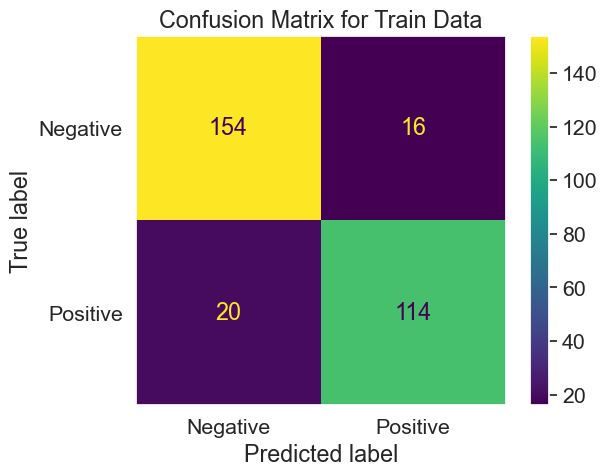

In [425]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


ConfusionMatrixDisplay.from_predictions(y_train,train_predictions)
plt.title("Confusion Matrix for Train Data")
plt.grid(False)
plt.show()

## Conducting Multinomial Naive Bayes Analysis on the Test Set in this Section

In [413]:
testing_data = count_vector.transform(X_test)

In [414]:
test_predictions = naive_bayes.predict(testing_data)

In [415]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score for Test Predictions: ", accuracy_score(y_test, test_predictions))
print("Recall score for Test Predictions: ", recall_score(y_test, test_predictions, average = 'weighted'))
print("Precision score for Test Predictions: ", precision_score(y_test, test_predictions, average = 'weighted'))
print("F1 score for Test Predictions: ", f1_score(y_test, test_predictions, average = 'weighted'))

Accuracy score for Test Predictions:  0.75
Recall score for Test Predictions:  0.75
Precision score for Test Predictions:  0.801923076923077
F1 score for Test Predictions:  0.7440737489025462


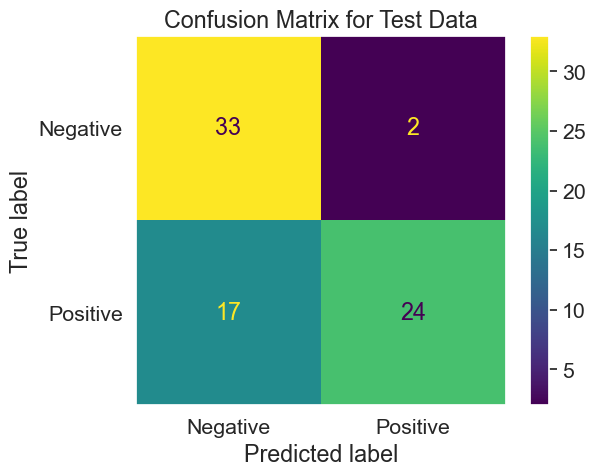

In [416]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,test_predictions)
plt.title("Confusion Matrix for Test Data")
plt.grid(False)
plt.show()

## Using Linear SVM as an alternative to Multinomial Naive Bayes 

In [417]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(training_data,y_train)

SVC(gamma='auto', kernel='linear')

In [418]:
predictions_SVM = SVM.predict(testing_data)

In [419]:
print("Accuracy score: ", accuracy_score(y_test, predictions_SVM))
print("Recall score: ", recall_score(y_test, predictions_SVM, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predictions_SVM, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predictions_SVM, average = 'weighted'))

Accuracy score:  0.8157894736842105
Recall score:  0.8157894736842105
Precision score:  0.8157894736842105
F1 score:  0.8157894736842106


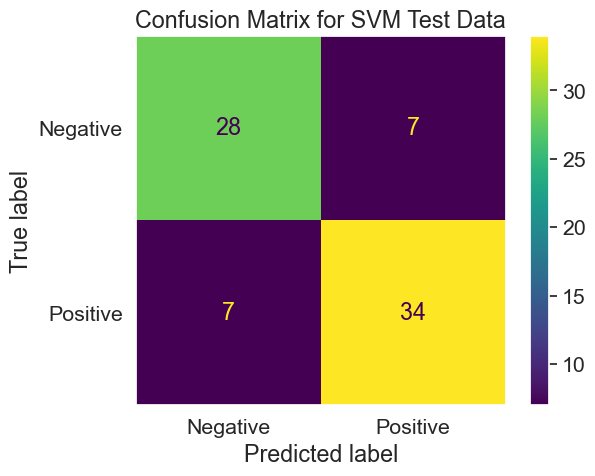

In [420]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,predictions_SVM)
plt.title("Confusion Matrix for SVM Test Data")
plt.grid(False)
plt.show()